* 인위적으로 만든 2차원 데이터셋을 사용해 GradientBoostingClassifier 분류기의 decision_function과 predict_proba 메서드가 어떤 역할을 하는지 살펴보겠습니다.

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import numpy as np
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# 예제를 위해 클래스의 이름을 "blue"와 "red"로 바꿉니다.
y_named = np.array(["blue", "red"])[y]
# 여러 개의 배열을 한꺼번에 train_test_split에 넣을 수 있습니다.
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
# 그레디언트 부스팅 모델을 만듭니다.
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 결정 함수(Decision Function)
* 이진 분류에서 decision_function 반환값의 크기는 (n_samples,)이며 각 샘플이 하나의 실수 값을 반환합니다.

In [6]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태", gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태 (25,)


In [7]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다.
print("결정 함수:\n", gbrt.decision_function(X_test)[:6])

결정 함수:
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [8]:
print("임계치와 결정 함수 결과 비교:\n", gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [10]:
# 불리언 값을 0과 1로 변환합니다.
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다.
pred = gbrt.classes_[greater_zero]
# pred와 gbrt.predict의 결과를 비교합니다.
print("pred는 예측 결과와 같다:", np.all(pred == gbrt.predict(X_test)))

pred는 예측 결과와 같다: True


In [11]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


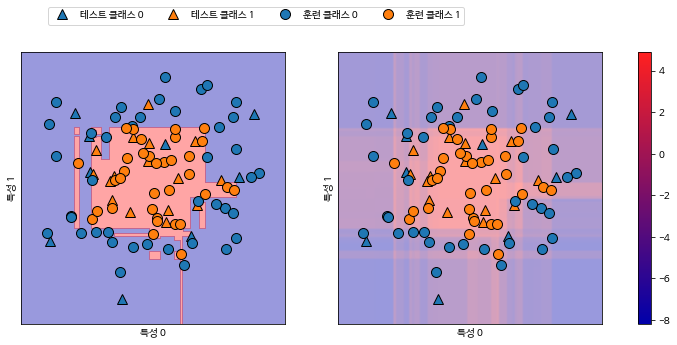

In [14]:
import matplotlib.pyplot as plt
import mglearn
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                               fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1)) 

In [15]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


In [ ]:
print("예측 확률:\n", gbrt.preduct_proba(X_test[:6]))